# Gapminder World Dataset Expolration
## by (Eman Abdelhalim)
### Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data cleaning</a></li>
<li><a href="#eda">Exploring Data </a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Gapminder has collected a lot of information about how people live their lives in different countries, tracked across the years, and on a number of different indicators like GDP per capita, life expectancy and Population and total health spending precent of GDP  





In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

 

In [2]:
#read data files into dataframes
gdp_cap = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
population = pd.read_csv('population_total.csv')
life_exp = pd.read_csv('life_expectancy_years.csv')
health_spending = pd.read_csv('total_health_spending_percent_of_gdp.csv')

In [3]:
gdp_cap.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,2550,2600,2660,2710,2770,2820,2880,2940,3000,3060
1,Albania,667,667,667,667,667,668,668,668,668,...,19400,19800,20200,20600,21000,21500,21900,22300,22800,23300
2,Algeria,715,716,717,718,719,720,721,722,723,...,14300,14600,14900,15200,15500,15800,16100,16500,16800,17100
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,73600,75100,76700,78300,79800,81500,83100,84800,86500,88300
4,Angola,618,620,623,626,628,631,634,637,640,...,6110,6230,6350,6480,6610,6740,6880,7020,7160,7310


In [4]:
population.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,3280000,...,76600000,76400000,76300000,76100000,76000000,75800000,75600000,75400000,75200000,74900000
1,Albania,400000,402000,404000,405000,407000,409000,411000,413000,414000,...,1330000,1300000,1270000,1250000,1220000,1190000,1170000,1140000,1110000,1090000
2,Algeria,2500000,2510000,2520000,2530000,2540000,2550000,2560000,2560000,2570000,...,70400000,70500000,70500000,70600000,70700000,70700000,70700000,70700000,70700000,70700000
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,63000,62900,62900,62800,62700,62700,62600,62500,62500,62400
4,Angola,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,1570000,...,168000000,170000000,172000000,175000000,177000000,179000000,182000000,184000000,186000000,188000000


In [5]:
life_exp.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,76.5,76.6,76.7,76.9,77.0,77.1,77.3,77.4,77.5,77.7
1,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.1,88.2,88.3
2,Algeria,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,...,88.3,88.4,88.5,88.6,88.7,88.8,88.9,89.0,89.1,89.2
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.7,78.9,79.0,79.1,79.3,79.4,79.5,79.7,79.8,79.9


In [6]:
health_spending.head()

,country,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0572,0.0682,0.0636,0.0663,0.0677,0.0730,0.0698,0.0758,0.0758
1,Albania,0.0256,0.0404,0.0481,0.0534,0.0583,0.0635,0.0604,0.0628,0.0616,0.0688,0.0684,0.0673,0.0688,0.0675,0.0688,0.0655
2,Algeria,0.0417,0.0379,0.0406,0.0406,0.0387,0.0349,0.0384,0.0387,0.0374,0.0338,0.0306,0.0313,0.0353,0.0373,0.0458,0.0417
3,Andorra,0.0764,0.0803,0.0803,0.0985,0.0735,0.0758,0.0679,0.0704,0.0712,0.0711,0.0722,0.0744,0.0755,0.0754,0.0752,0.0752
4,Angola,0.0379,0.0217,0.0226,0.0185,0.0194,0.0241,0.0345,0.0236,0.0264,0.0209,0.0196,0.0242,0.0252,0.0319,0.0495,0.0285


<a id='wrangling'></a>
## Data Cleaning 

In [7]:
#copy data
gdp_cap_1 = gdp_cap.copy()
population_1 = population.copy()
life_exp_1 = life_exp.copy()
health_spending_1 = health_spending.copy()

In [8]:
#selecting only years that I will make the analysis on it
gdp_cap_1= gdp_cap_1.loc[:,['country','2010']]
population_1= population_1.loc[:,['country','2010']]
life_exp_1= life_exp_1.loc[:,['country','2010']]
health_spending_1=health_spending_1.loc[:,['country','2010']]

In [9]:
#edit column names 
gdp_cap_1.rename(columns={'2010': 'GDP_cap'}, inplace= True)
population_1.rename(columns={'2010': 'population'}, inplace= True)
life_exp_1.rename(columns={'2010': 'life_exp'}, inplace= True)
health_spending_1.rename(columns={'2010': 'health_spending'}, inplace= True)

In [10]:
#check that only 2 years that I have interested in only selected
print(gdp_cap_1.info())
print(population_1.info())
print(life_exp_1.info())
print(health_spending_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  193 non-null    object
 1   GDP_cap  193 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country     195 non-null    object
 1   population  195 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country   187 non-null    object 
 1   life_exp  187 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 ent

**I will make my analysis in 2010 so I will make new dataframs that will include the 4 indictors combine in 1 dataframe** 


In [11]:
#make new dataframe include all indictores in 2010
dataframe_list=[gdp_cap_1, population_1, life_exp_1, health_spending_1]
df = pd.concat(dataframe_list)
df = df.groupby('country')['GDP_cap', 'population','life_exp','health_spending'].sum().reset_index()

<ipython-input-11-f416a0518016>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = df.groupby('country')['GDP_cap', 'population','life_exp','health_spending'].sum().reset_index()


In [12]:
df.head()

,country,GDP_cap,population,life_exp,health_spending
0,Afghanistan,1670.0,29200000.0,59.9,0.0758
1,Albania,9930.0,2950000.0,77.6,0.0655
2,Algeria,12900.0,36000000.0,76.3,0.0417
3,Andorra,39000.0,84500.0,82.3,0.0752
4,Angola,6360.0,23400000.0,59.9,0.0285


In [13]:
#replace zero values with NAN 
df.replace(0, np.nan, inplace = True)
df.head()

,country,GDP_cap,population,life_exp,health_spending
0,Afghanistan,1670.0,29200000.0,59.9,0.0758
1,Albania,9930.0,2950000.0,77.6,0.0655
2,Algeria,12900.0,36000000.0,76.3,0.0417
3,Andorra,39000.0,84500.0,82.3,0.0752
4,Angola,6360.0,23400000.0,59.9,0.0285


In [14]:
#checking for missing values
df.isnull().sum()

country             0
GDP_cap             2
population          0
life_exp            8
health_spending    10
dtype: int64

In [15]:
#drop missing values
df.dropna(inplace=True)
#confirm that all missing values removed
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 0 to 193
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          179 non-null    object 
 1   GDP_cap          179 non-null    float64
 2   population       179 non-null    float64
 3   life_exp         179 non-null    float64
 4   health_spending  179 non-null    float64
dtypes: float64(4), object(1)
memory usage: 8.4+ KB


In [16]:
#convert GDP and populationfrom float to integer
df[['GDP_cap','population']]= df[['GDP_cap','population']].astype(int)

In [17]:
#edit health spending column by multiplying all values by 100 
df['health_spending']= df['health_spending']*100
df['health_spending']

0      7.58
1      6.55
2      4.17
3      7.52
4      2.85
       ... 
189    5.25
190    4.91
191    6.84
192    5.18
193    5.89
Name: health_spending, Length: 179, dtype: float64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 0 to 193
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          179 non-null    object 
 1   GDP_cap          179 non-null    int32  
 2   population       179 non-null    int32  
 3   life_exp         179 non-null    float64
 4   health_spending  179 non-null    float64
dtypes: float64(2), int32(2), object(1)
memory usage: 7.0+ KB


In [19]:
df.head()

,country,GDP_cap,population,life_exp,health_spending
0,Afghanistan,1670,29200000,59.9,7.58
1,Albania,9930,2950000,77.6,6.55
2,Algeria,12900,36000000,76.3,4.17
3,Andorra,39000,84500,82.3,7.52
4,Angola,6360,23400000,59.9,2.85


In [20]:
#summary statistics for GDP per capita
df['GDP_cap'].describe()

count       179.000000
mean      16825.994413
std       18736.667394
min         660.000000
25%        3370.000000
50%       10000.000000
75%       22550.000000
max      120000.000000
Name: GDP_cap, dtype: float64

summary statistics reveal that annual GDP per capita ranges from 660 to 12,000. the mean is 16,825  is greater than median 10,000, meaning that the distribution is right-skewed with higher end outliers.

In [21]:
#summary statistics for life expectancy
df['life_exp'].describe()

count    179.000000
mean      70.648603
std        8.832005
min       32.500000
25%       64.150000
50%       73.400000
75%       77.100000
max       83.200000
Name: life_exp, dtype: float64

summary statistics reveal that life expectancy ranges from 30 to 80 years.
the mean is 70 is smaller than the median 73, that mean the distribution is left-skewed with lower end outliers.

<a id='eda'></a>
# Exploring data
## Univariate Exploration

> I'll start by looking at the distribution of the main variable of interest: GDP per capita and life expectancy

(0.0, 120000.0)

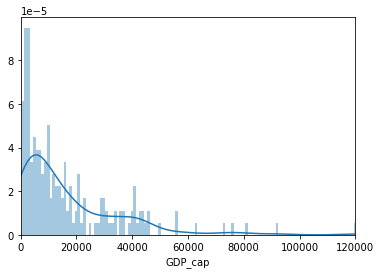

In [22]:
#histogram of GDP per capita
bins = np.arange(400,df['GDP_cap'].max()+1000,1000)
sns.distplot(df.GDP_cap, bins = bins);
plt.xlim(0,120000)

Text(0.5, 1.0, 'GDP per capita in USD ')

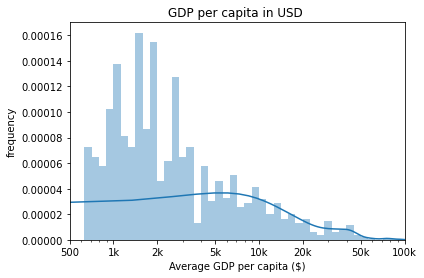

In [23]:
# put GDP on a log scale to handle the skweed tails
log_binsize= 0.05
bins = 10 ** np.arange(2.6,np.log10(df['GDP_cap'].max())+log_binsize,log_binsize)
sns.distplot(df.GDP_cap, bins = bins);
plt.xscale('log')
plt.xticks([500,1e3, 2e3, 5e3,1e4,2e4,5e4,1e5],[500,'1k','2k','5k','10k','20k','50k','100k']);
plt.xlim(500,100000)
plt.xlabel("Average GDP per capita ($)")
plt.ylabel('frequency')
plt.title("GDP per capita in USD ")


the histgram illustrates that GDP per capita distribution is right-skewed with higher end outliers when plotted GDP per capita on log scale the distribution looks multimodel and these peaks(5K,7k,10k)represent standard GDP per capita 

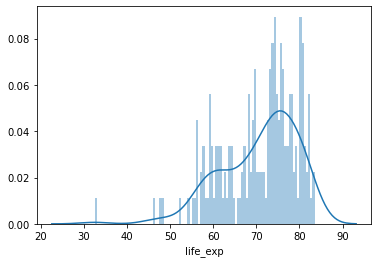

In [24]:
#histogram of life expectancy
bins = np.arange(30,df['life_exp'].max()+0.5,0.5)
sns.distplot(df.life_exp, bins = bins);

Text(0.5, 0, 'life expectancy')

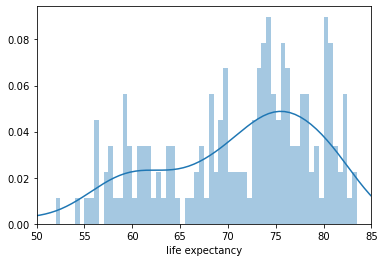

In [25]:
#plot life expectancy distribution with xlim to remove the low outliers
bins = np.arange(40,df['life_exp'].max()+0.5,0.5)
sns.distplot(df.life_exp, bins = bins);
plt.xlim(50,85)
plt.xlabel('life expectancy')

a histogram illustrates that the distribution of life expectancy is left-skewed with low end outliers and I do limitaion on x scale and the distribution looks multimodel with peaks on (59,62,65,75) this meaning average number of years remaining for an individual or a group of people at a given age is (59,62,65,75)yeas.





### which countries in the world have the highest GDP per capita in  2010?

In [26]:
# get the countries that have highest of GDP
top_GDP = df.nlargest(10,['GDP_cap'])
top_GDP

,country,GDP_cap,population,life_exp,health_spending
141,Qatar,120000,1860000,78.0,1.81
100,Luxembourg,91700,508000,80.8,7.77
24,Brunei,80600,389000,75.1,2.84
90,Kuwait,75400,2990000,81.2,2.63
153,Singapore,73100,5130000,83.2,3.96
129,Norway,62400,4890000,80.9,9.48
169,Switzerland,55900,7810000,82.5,11.50
184,United Arab Emirates,55400,8550000,72.9,3.66
186,United States,49500,309000000,78.7,17.90
122,Netherlands,46100,16700000,80.8,11.90


Text(0.5, 1.0, 'Top 10 countries ranked by GDP per capita in 2010')

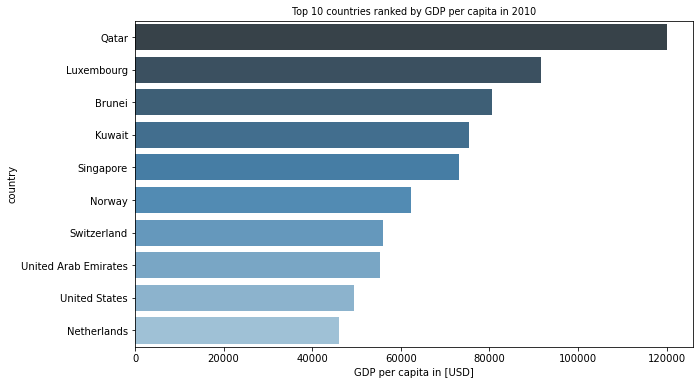

In [27]:
#visulaize  the top 10 countries ranked by total GDP
fig, ax = plt.subplots(figsize=(10,6))
sns.set_context("paper")
ax =sns.barplot(x=df['GDP_cap'],y=top_GDP['country'],data= df,palette="Blues_d")
plt.xlabel('GDP per capita in [USD]')
plt.title("Top 10 countries ranked by GDP per capita in 2010")

As we can seen from the pervious bars Qatar have the highest annual Gross domestic product per capita with 120000 $

<AxesSubplot:>

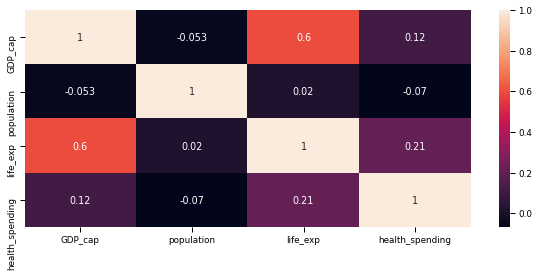

In [39]:
# Heatmap of correlation between population, life expectancy, and GDP per capita
plt.figure(figsize=[10,4])
df_corr = df.loc[:,['GDP_cap', 'population', 'life_exp','health_spending']]
sns.heatmap(df_corr.corr(), annot=True)


A heatmap of correlation between population, life expectancy, and GDP per capita illustrates strong pearson coefficient of 0.6 between GDP per capita and life expectancy 



## life expectancy Vs. GDP per capita

<AxesSubplot:xlabel='GDP_cap', ylabel='life_exp'>

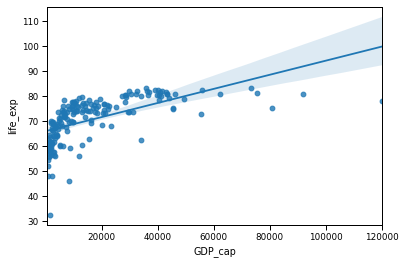

In [29]:
#scatterplot of life expectancy Vs. GDP per capita
sns.regplot(data=df, x='GDP_cap', y='life_exp')


Text(0.5, 1.0, 'life expectancy Vs. GDP per capita')

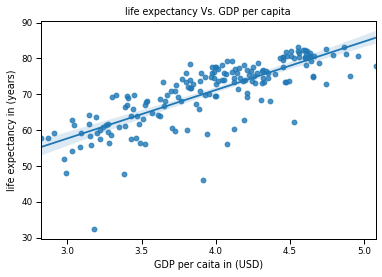

In [31]:
#transfom the GDP per capita to get liner relationship between life expectancy
def log_trans(x, inverse= False):
    if not inverse:
        return np.log10(x)
    else :
        return np.power(10,x)
    
sns.regplot(df['GDP_cap'].apply(log_trans), df['life_exp'])
plt.xlabel('GDP per caita in (USD)')
plt.ylabel('life expectancy in (years)')
plt.title("life expectancy Vs. GDP per capita")    

this scatterplot shows that countries with higher GDP per capita tending toward higher life expectancy, whereas GDP per capita varies geometrically (multiplicativity)rather than arithmetically (additively) between countries so I've used log transformtion for x axis to better visualize the upword trend in life expectancy

In [45]:
top_pop = df.nlargest(10,['population'])
top_pop

,country,GDP_cap,population,life_exp,health_spending
35,China,9500,1370000000,75.8,5.07
77,India,4450,1230000000,66.7,4.05
186,United States,49500,309000000,78.7,17.90
78,Indonesia,8460,242000000,69.7,2.61
23,Brazil,14600,196000000,74.4,9.01
131,Pakistan,4070,179000000,64.3,2.20
126,Nigeria,5080,159000000,60.5,5.07
13,Bangladesh,2520,148000000,69.5,3.52
143,Russia,23300,143000000,68.1,5.08
85,Japan,35800,129000000,83.1,9.49


Text(49500, 78.7, 'USA')

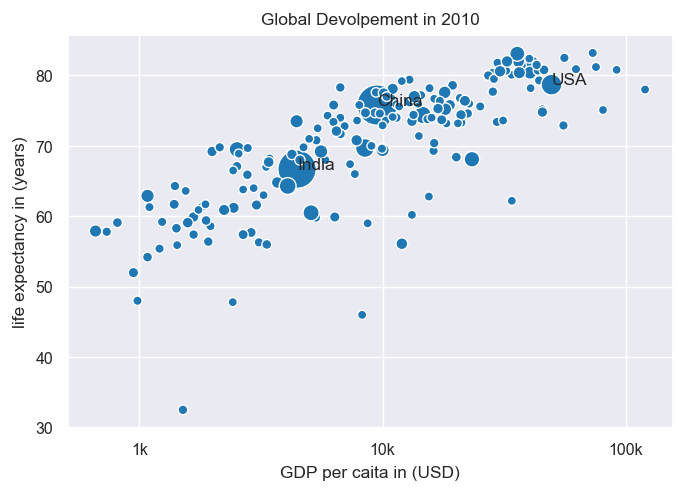

In [52]:
#Set the style to "darkgrid
sns.set_style("darkgrid")
#set array of population in millions to use for bubble size
pop = np.array(df.population)/1000000

plt.figure(dpi=130)
#Build seaborn scatterplot, setting puple size by population 
sns.scatterplot(df['GDP_cap'],df['life_exp'], size= pop,sizes=(25,500),legend=False)
plt.xscale('log')
plt.xticks([1000,10000,100000],['1k','10k','100k']);

#Format axis labels and text for call-out countries. 
plt.xlabel('GDP per caita in (USD)')
plt.ylabel('life expectancy in (years)')
plt.title('Global Devolpement in 2010')
plt.text(9500,75.8,'China')
plt.text(4450,66.7,'India')
plt.text(49500,78.7,'USA')


As we can seen here also, countries that achieved highest values of GDP per capita have highest life expectancy.

 addition to the population play big role beside GDP to effect in life expectancy where a lot of these countries with large populations tend to life expectancy decress and GDP per capita like India . 
 
on the opposite, countries with relatively small population tend up word highest life expectancy and highest GDP per capita like United States and Chines
so countries with large economies tends to decreas population.



## Submitting your Project 


In [34]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_Gapminder_world_dataset.ipynb'])

0